In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

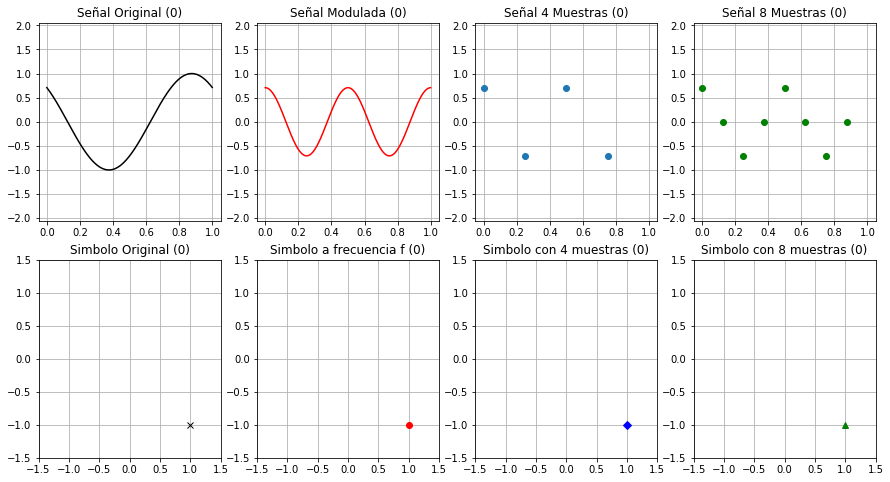

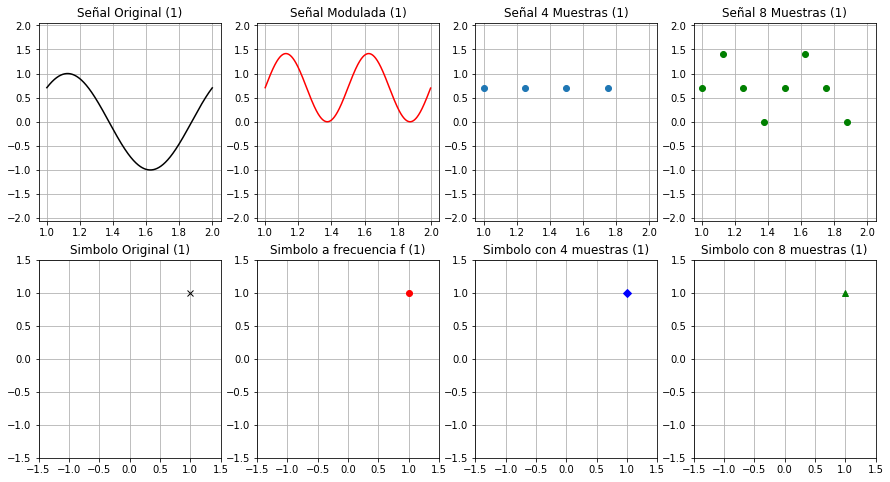

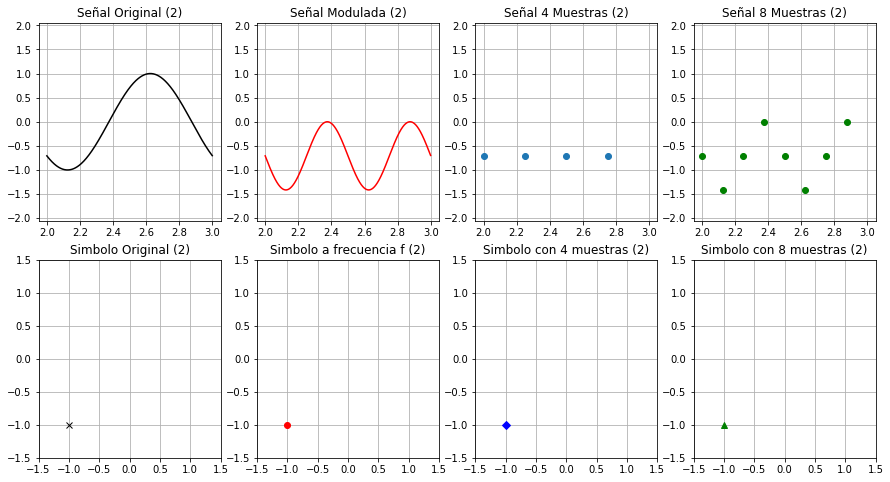

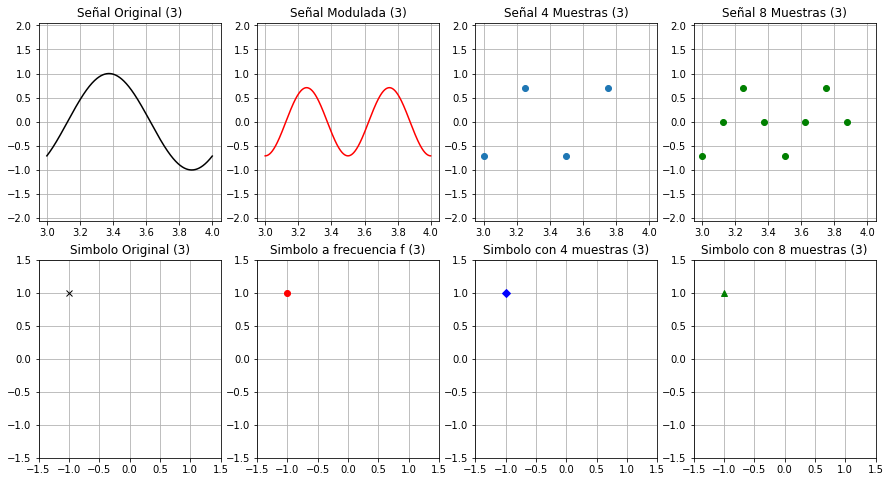

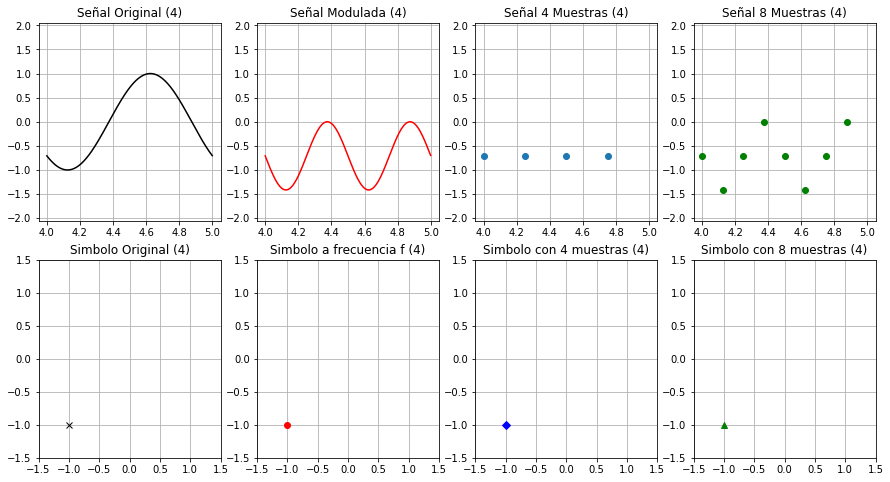

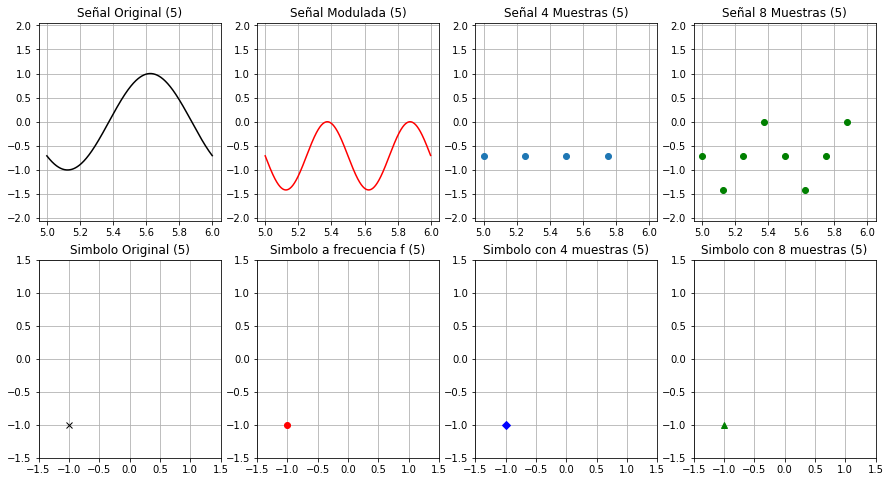

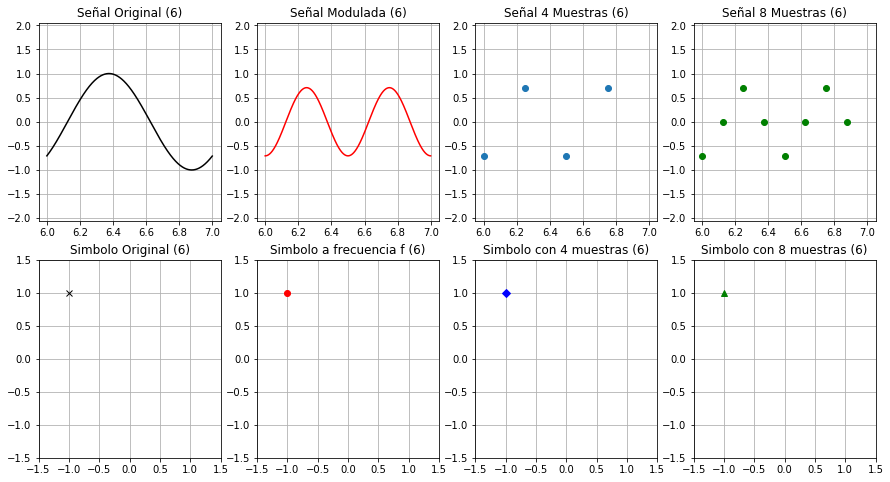

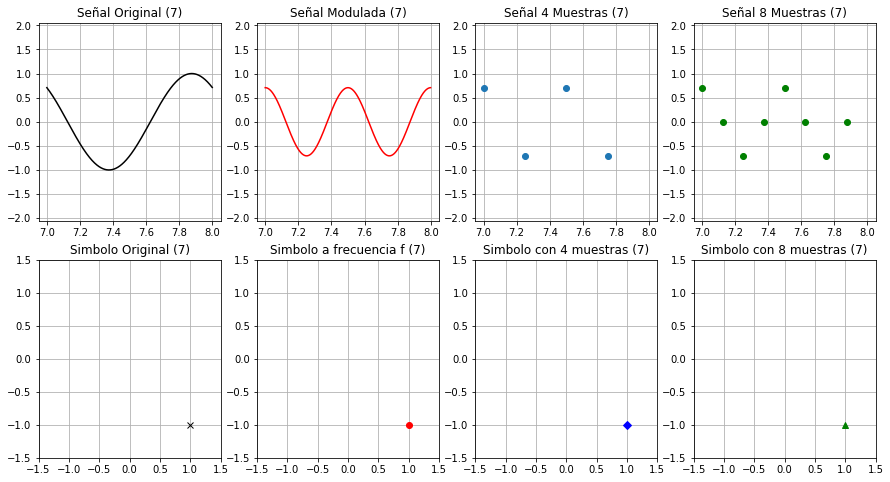

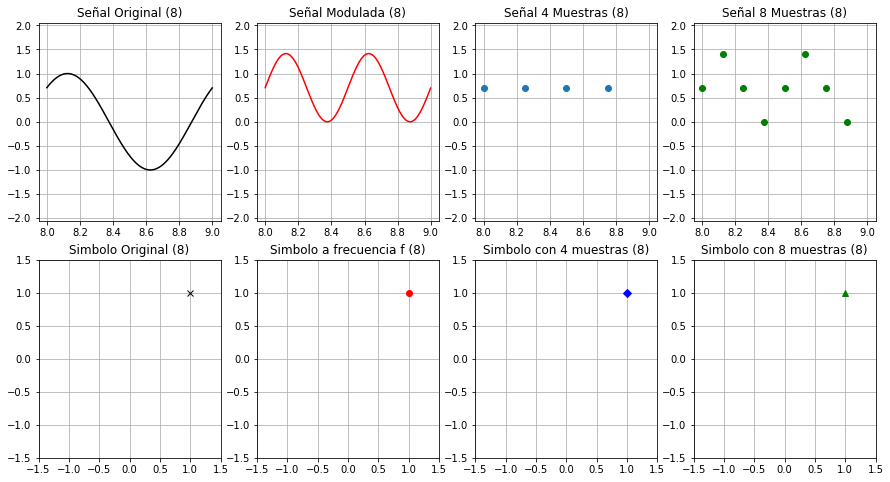

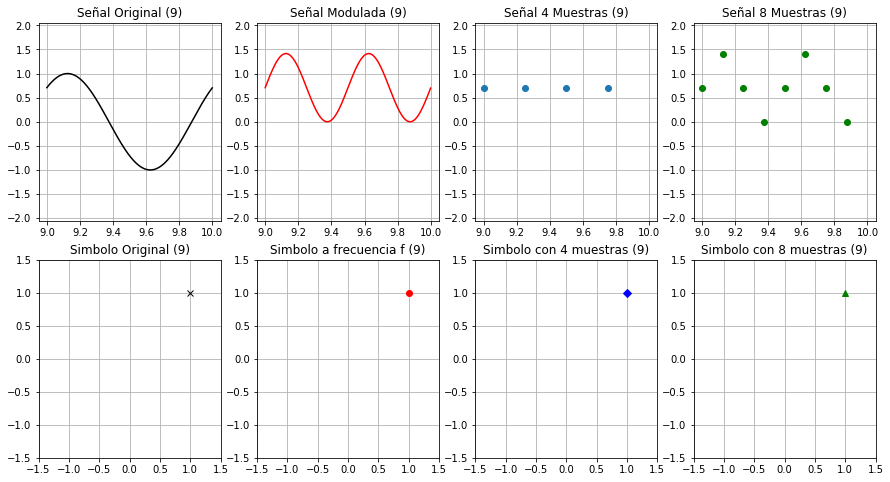

In [2]:
t=np.arange(0,1,0.001);    #variable de tiempo
f= 1;            #variable de frecuencia
K = 10;         #cantidad de simbolos


for k in range(K): #Generacion de un simbolo codificado en fase+i*cuadratura
    d_i = np.random.rand(1,1)>0.5; # señal fase
    d_q = np.random.rand(1,1)>0.5; # señal cuadratura
    
    x = (2*d_i-1) + 1j*(2*d_q-1); #señal original en el tiempo
    
    x_i = 1/np.sqrt(2)*(2*d_i-1)*np.cos(2*np.pi*f*t + (k-1)*2*np.pi); #modulacion señal en fase
    x_q = 1/np.sqrt(2)*(2*d_q-1)*np.sin(2*np.pi*f*t + (k-1)*2*np.pi); #modulacion señal en cuadratura
    
    x_t = x_i + x_q; #señal generada en el tiempo para transmision
    
    y_i = x_t * np.cos(2*np.pi*f*t); #muestreo a 1khz
    y_q = x_t * np.sin(2*np.pi*f*t); #muestreo a 1khz

    y_t= (2*(np.sum(y_i)>0)-1) + 1j*(2*(np.sum(y_q)>0)-1); #simbolo obtenido a 1khz
    
    #Etapa de Muestreo
    tmuestreo1=np.zeros(4); #tiempos de muestreo (se calculan despues)
    x4muestras_i=np.zeros(4); #contenedores de muestras
    x4muestras_q=np.zeros(4);

    tmuestreo2=np.zeros(8); #tiempos de muestreo (se calculan despues)
    x8muestras_i=np.zeros(8); #contenedores de muestras
    x8muestras_q=np.zeros(8);

    for muestreo in range(len(tmuestreo1)): #muestro de 4 muestras (4 Hz)
        tmuestreo=int((len(t)/len(tmuestreo1))*muestreo);
        tmuestreo1[muestreo]=tmuestreo/1000;
        x4muestras_i[muestreo]= x_t[0][tmuestreo]*np.cos(2*np.pi*f*t[tmuestreo]+(k-1)*2*np.pi); #muestreo de la señal en 4 muestras (con pulsos) para fase
        x4muestras_q[muestreo]= x_t[0][tmuestreo]*np.sin(2*np.pi*f*t[tmuestreo]+(k-1)*2*np.pi); #muestreo de la señal en 4 muestras (con pulsos) para cuadratura

    for muestreo in range(len(tmuestreo2)): #muestreo de 8 muestras (8 Hz)
        tmuestreo=int((len(t)/len(tmuestreo2))*muestreo);
        tmuestreo2[muestreo]=tmuestreo/1000;
        x8muestras_i[muestreo]= x_t[0][tmuestreo]*np.cos(2*np.pi*f*t[tmuestreo]+(k-1)*2*np.pi); #muestreo de la señal en 8 muestras para obtener fase
        x8muestras_q[muestreo]= x_t[0][tmuestreo]*np.sin(2*np.pi*f*t[tmuestreo]+(k-1)*2*np.pi); #muestreo de la señal en 8 muestras para obtener cuadratura
    
    x4muestras=x4muestras_i+x4muestras_q; #muestras
    x8muestras=x8muestras_i+x8muestras_q;
    
    x4muestras_t= (2*(np.sum(x4muestras_i)>0)-1) + 1j*(2*(np.sum(x4muestras_q)>0)-1); #Simbolo interpretado con 4 muestras 
    x8muestras_t= (2*(np.sum(x8muestras_i)>0)-1) + 1j*(2*(np.sum(x8muestras_q)>0)-1); #Simbolo interpretado con 8 muestras

    #Etapa de representacion
    fig1=plt.figure(figsize=(15,8));
    ax1 = plt.subplot2grid((2,4),(0,0));
    ax2 = plt.subplot2grid((2,4),(0,1));
    ax3 = plt.subplot2grid((2,4),(1,0));
    ax4 = plt.subplot2grid((2,4),(1,1));
    
    ax5 = plt.subplot2grid((2,4),(0,2));
    ax6 = plt.subplot2grid((2,4),(1,2));
    
    ax7 = plt.subplot2grid((2,4),(0,3));
    ax8 = plt.subplot2grid((2,4),(1,3));
    
    #Graficos 
    ax1.plot(t+k,x_t[0][:],'k');
    ax1.set_title('Señal Original (' + str(k) + ')');
    ax1.grid();
    ax1.set_xlim([np.min(t+k)-0.05,np.max(t+k)+0.05]);
    ax1.set_ylim([-2-0.05,2+0.05]);
    
    ax2.plot(t+k,(y_i[0][:]+y_q[0][:]),'r');
    ax2.set_title('Señal Modulada (' + str(k) + ')');
    ax2.grid();
    ax2.set_xlim([np.min(t+k)-0.05,np.max(t+k)+0.05]);
    ax2.set_ylim([-2-0.05,2+0.05]);

    ax3.plot(x.real,x.imag,'kx');
    ax3.set_title('Simbolo Original (' + str(k) + ')');
    ax3.grid();
    ax3.set_xlim([-1.5,1.5]);
    ax3.set_ylim([-1.5,1.5]);

    ax4.plot(y_t.real,y_t.imag,'ro'); 
    ax4.set_title('Simbolo a frecuencia f (' + str(k) + ')');
    ax4.grid();
    ax4.set_xlim([-1.5,1.5]);
    ax4.set_ylim([-1.5,1.5]);
    
    ax5.plot(tmuestreo1+k,x4muestras,'o');
    ax5.set_title('Señal 4 Muestras (' + str(k) + ')');
    ax5.grid();
    ax5.set_xlim([np.min(t+k)-0.05,np.max(t+k)+0.05]);
    ax5.set_ylim([-2-0.05,2+0.05]);

    ax6.plot(x4muestras_t.real,x4muestras_t.imag,'bD');
    ax6.set_title('Simbolo con 4 muestras (' + str(k) + ')');
    ax6.grid();
    ax6.set_xlim([-1.5,1.5]);
    ax6.set_ylim([-1.5,1.5]);
    
    ax7.plot(tmuestreo2+k,x8muestras,'go');
    ax7.set_title('Señal 8 Muestras (' + str(k) + ')');
    ax7.grid();
    ax7.set_xlim([np.min(t+k)-0.05,np.max(t+k)+0.05])
    ax7.set_ylim([-2-0.05,2+0.05])

    ax8.plot(x8muestras_t.real,x8muestras_t.imag,'g^');
    ax8.set_title('Simbolo con 8 muestras (' + str(k) + ')');
    ax8.grid();
    ax8.set_xlim([-1.5,1.5]);
    ax8.set_ylim([-1.5,1.5]);
    
    plt.pause(2);

    


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


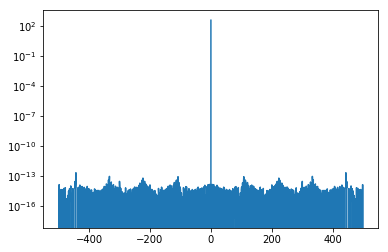

In [3]:
ffti=np.fft.fft(y_i)
fftq=np.fft.fft(y_q)
freq=np.fft.fftfreq(t.shape[-1],d=0.001)
plt.semilogy(freq,fftq[0])

In [7]:
a=range(10)
print(a[0:3])
print(a[4:6])


range(0, 3)
range(4, 6)
